In [2]:
### Setting env
import os, sys

folder = os.getcwd()
if(not(folder.endswith('tcc-machine-learning'))):
        os.chdir('..')
folder = os.getcwd()

### Core Packages
import pandas as pd
import numpy as np

### Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import plotly.graph_objects as go

### Financial Packages
import yfinance as yf
import pandas_datareader as pdr

### Thecnical Analysis Packages
import pandas_datareader as pdr
import ta
import pandas_ta as pdta
import talib

### Functions
from dags import config
from dags.utils import chose_path_to_work, save_image, generate_bollinger_bands, generate_ifr, generate_macd, generate_mme, generate_mme_label, generate_mms, generate_mms_label, generate_label

### Others
import warnings

In [3]:
ticker = 'petr4.sa'
df_ticker = pd.read_csv(f'data/processed/{ticker}_processed.csv', encoding='utf8', delimiter=',')
df_ticker['date'] = pd.to_datetime(df_ticker['date'])

In [5]:
df_ticker_target

,date,open,high,low,close,adj_close,volume,mms_15,mms_30,mms_compra,...,macd,macd_sinal,macd_hist,macd_alta,macd_baixa,%_k,%D,dema,momentum,roc
3790,2015-01-02,9.990000,9.990000,9.350000,9.360000,4.714058,49559500,10.112667,11.526333,0,...,-0.969978,-1.090785,0.120806,0,0,25.203231,45.826841,9.322481,0.299999,3.311250
3791,2015-01-05,9.140000,9.190000,8.530000,8.560000,4.311147,78385100,9.922000,11.391667,0,...,-1.031894,-1.079006,0.047113,0,0,8.962106,26.209008,9.095323,-0.809999,-8.644605
3792,2015-01-06,8.710000,8.830000,8.040000,8.280000,4.170128,84723300,9.748667,11.252667,0,...,-1.090980,-1.081401,-0.009579,0,1,3.828776,12.664704,8.859339,-1.190001,-12.566003
3793,2015-01-07,8.560000,8.730000,8.360000,8.670000,4.366548,85531000,9.618000,11.115667,0,...,-1.093728,-1.083867,-0.009862,0,0,12.716448,8.502443,8.699109,-0.900000,-9.404385
3794,2015-01-08,8.790000,9.390000,8.740000,9.230000,4.648584,83306300,9.554000,10.946667,0,...,-1.038745,-1.074842,0.036097,1,0,32.632781,16.392668,8.628694,-0.600000,-6.103768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5688,2022-08-22,31.740000,32.580002,30.480000,32.410000,32.410000,92400300,33.982666,32.005000,0,...,0.538738,0.988835,-0.450097,0,0,64.464580,59.783728,33.601144,-4.220001,-11.520615
5689,2022-08-23,32.630001,33.500000,32.619999,33.439999,33.439999,73215800,33.956666,32.178666,0,...,0.530084,0.897085,-0.367000,0,0,63.905225,62.191639,33.658190,-3.790001,-10.179965
5690,2022-08-24,33.540001,34.119999,33.250000,33.639999,33.639999,61067900,33.942666,32.358333,0,...,0.533218,0.824312,-0.291093,0,0,80.195583,69.521796,33.732178,-3.470001,-9.350582
5691,2022-08-25,34.099998,34.360001,32.669998,33.279999,33.279999,99511600,33.880666,32.551333,0,...,0.500879,0.759625,-0.258746,0,0,84.019943,76.040250,33.751590,-2.970001,-8.193107


In [4]:
df_ticker_target = df_ticker.loc[df_ticker['date'] >= '2015-01-01']
df_ticker3 = generate_label(3, df_ticker_target)
df_ticker5 = generate_label(5, df_ticker_target)
df_ticker7 = generate_label(7, df_ticker_target)
df_ticker9 = generate_label(9, df_ticker_target)
df_ticker11 = generate_label(11, df_ticker_target)
df_ticker13 = generate_label(13, df_ticker_target)
df_ticker15 = generate_label(15, df_ticker_target)
df_ticker17 = generate_label(17, df_ticker_target)
df_ticker19 = generate_label(19, df_ticker_target)
df_ticker21 = generate_label(21, df_ticker_target)
df_ticker23 = generate_label(23, df_ticker_target)
df_ticker25 = generate_label(25, df_ticker_target)
df_ticker27 = generate_label(25, df_ticker_target)
df_ticker30 = generate_label(30, df_ticker_target)

##### compra

###### 1 - 0 =  1  -> erro
###### 1 - 1 =  0  -> acerto
###### 0 - 0 =  0  -> neutro
###### 0 - 1 = -1  -> neutro

##### venda

###### 1 - 0 =  1  -> acerto
###### 1 - 1 =  0  -> erro
###### 0 - 0 =  0  -> neutro
###### 0 - 1 = -1  -> neutro

In [77]:
def valida_mms_label(df, print_percent = False):
    df['tipo_acerto_compra'] = np.where((df['mms_compra'] == 1) & (df['target'] == 1), 1, 
                                            np.where((df['mms_compra'] == 1) & (df['target'] == 0), -1, 0))

    df['tipo_acerto_venda'] = np.where((df['mms_venda'] == 1) & (df['target'] == 0), 1, 
                                            np.where((df['mms_venda'] == 1) & (df['target'] == 1), -1, 0))
                                            
    total = df.shape[0]

    acertos_compra = df['tipo_acerto_compra'].value_counts()[1]
    erros_compra = df['tipo_acerto_compra'].value_counts()[-1]

    acertos_venda = df['tipo_acerto_venda'].value_counts()[1]
    erros_venda = df['tipo_acerto_venda'].value_counts()[-1]

    porcent_compra = acertos_compra / (acertos_compra + erros_compra)
    porcent_venda = acertos_venda / (acertos_venda + erros_venda)

    porcentagem_previsao_compra =  (acertos_compra + erros_compra) / total
    porcentagem_previsao_venda =  (acertos_venda + erros_venda) / total

    porcentagem_previsao =  (acertos_compra  + acertos_venda +  erros_compra + erros_venda) / total

    if print_percent == True:
        
        print(f"Porcentagem de previsao: {round(porcentagem_previsao * 100, 2)}%\n")

        print(f"Porcentagem de previsões de compra: {round(porcentagem_previsao_compra * 100, 2)}%")
        print(f"Porcentagem de acerto na compra: {round(porcent_compra * 100, 2)}%\n")

        print(f"Porcentagem de previsões de venda: {round(porcentagem_previsao_venda * 100, 2)}%")
        print(f"Porcentagem de acerto na venda: {round(porcent_venda * 100, 2)}%\n")

    return porcent_compra, porcent_venda, porcentagem_previsao_compra, porcentagem_previsao_venda

def valida_bb_label(df, print_percent = False):
    df['tipo_acerto_compra'] = np.where((df['bb_sobrevendida'] == 1) & (df['target'] == 1), 1, 
                                            np.where((df['bb_sobrevendida'] == 1) & (df['target'] == 0), -1, 0))

    df['tipo_acerto_venda'] = np.where((df['bb_sobrecomprada'] == 1) & (df['target'] == 0), 1, 
                                            np.where((df['bb_sobrecomprada'] == 1) & (df['target'] == 1), -1, 0))
                                            
    total = df.shape[0]

    acertos_compra = df['tipo_acerto_compra'].value_counts()[1]
    erros_compra = df['tipo_acerto_compra'].value_counts()[-1]

    acertos_venda = df['tipo_acerto_venda'].value_counts()[1]
    erros_venda = df['tipo_acerto_venda'].value_counts()[-1]

    porcent_compra = acertos_compra / (acertos_compra + erros_compra)
    porcent_venda = acertos_venda / (acertos_venda + erros_venda)

    porcentagem_previsao_compra =  (acertos_compra + erros_compra) / total
    porcentagem_previsao_venda =  (acertos_venda + erros_venda) / total

    porcentagem_previsao =  (acertos_compra  + acertos_venda +  erros_compra + erros_venda) / total

    if print_percent == True:
        print(f"Porcentagem de previsao: {round(porcentagem_previsao * 100, 2)}%\n")

        print(f"Porcentagem de previsões de compra: {round(porcentagem_previsao_compra * 100, 2)}%")
        print(f"Porcentagem de acerto na compra: {round(porcent_compra * 100, 2)}%\n")

        print(f"Porcentagem de previsões de venda: {round(porcentagem_previsao_venda * 100, 2)}%")
        print(f"Porcentagem de acerto na venda: {round(porcent_venda * 100, 2)}%\n")

    return porcent_compra, porcent_venda, porcentagem_previsao_compra, porcentagem_previsao_venda

def valida_ifr_label(df, print_percent = False):
    df['tipo_acerto_compra'] = np.where((df['ifr_sobrevendida'] == 1) & (df['target'] == 1), 1, 
                                            np.where((df['ifr_sobrevendida'] == 1) & (df['target'] == 0), -1, 0))

    df['tipo_acerto_venda'] = np.where((df['ifr_sobrecomprada'] == 1) & (df['target'] == 0), 1, 
                                            np.where((df['ifr_sobrecomprada'] == 1) & (df['target'] == 1), -1, 0))
                                            
    total = df.shape[0]

    acertos_compra = df['tipo_acerto_compra'].value_counts()[1]
    erros_compra = df['tipo_acerto_compra'].value_counts()[-1]

    acertos_venda = df['tipo_acerto_venda'].value_counts()[1]
    erros_venda = df['tipo_acerto_venda'].value_counts()[-1]

    porcent_compra = acertos_compra / (acertos_compra + erros_compra)
    porcent_venda = acertos_venda / (acertos_venda + erros_venda)

    porcentagem_previsao_compra =  (acertos_compra + erros_compra) / total
    porcentagem_previsao_venda =  (acertos_venda + erros_venda) / total

    porcentagem_previsao =  (acertos_compra  + acertos_venda +  erros_compra + erros_venda) / total

    if print_percent == True:

        print(f"Porcentagem de previsao: {round(porcentagem_previsao * 100, 2)}%\n")

        print(f"Porcentagem de previsões de compra: {round(porcentagem_previsao_compra * 100, 2)}%")
        print(f"Porcentagem de acerto na compra: {round(porcent_compra * 100, 2)}%\n")

        print(f"Porcentagem de previsões de venda: {round(porcentagem_previsao_venda * 100, 2)}%")
        print(f"Porcentagem de acerto na venda: {round(porcent_venda * 100, 2)}%\n")

    return porcent_compra, porcent_venda, porcentagem_previsao_compra, porcentagem_previsao_venda

def valida_macd_label(df, print_percent = False):
    df['tipo_acerto_compra'] = np.where((df['macd_alta'] == 1) & (df['target'] == 1), 1, 
                                            np.where((df['macd_alta'] == 1) & (df['target'] == 0), -1, 0))

    df['tipo_acerto_venda'] = np.where((df['macd_baixa'] == 1) & (df['target'] == 0), 1, 
                                            np.where((df['macd_baixa'] == 1) & (df['target'] == 1), -1, 0))
                                            
    total = df.shape[0]

    acertos_compra = df['tipo_acerto_compra'].value_counts()[1]
    erros_compra = df['tipo_acerto_compra'].value_counts()[-1]

    acertos_venda = df['tipo_acerto_venda'].value_counts()[1]
    erros_venda = df['tipo_acerto_venda'].value_counts()[-1]

    porcent_compra = acertos_compra / (acertos_compra + erros_compra)
    porcent_venda = acertos_venda / (acertos_venda + erros_venda)

    porcentagem_previsao_compra =  (acertos_compra + erros_compra) / total
    porcentagem_previsao_venda =  (acertos_venda + erros_venda) / total

    porcentagem_previsao =  (acertos_compra  + acertos_venda +  erros_compra + erros_venda) / total

    if print_percent == True:
        print(f"Porcentagem de previsao: {round(porcentagem_previsao * 100, 2)}%\n")

        print(f"Porcentagem de previsões de compra: {round(porcentagem_previsao_compra * 100, 2)}%")
        print(f"Porcentagem de acerto na compra: {round(porcent_compra * 100, 2)}%\n")

        print(f"Porcentagem de previsões de venda: {round(porcentagem_previsao_venda * 100, 2)}%")
        print(f"Porcentagem de acerto na venda: {round(porcent_venda * 100, 2)}%\n")

    return porcent_compra, porcent_venda, porcentagem_previsao_compra, porcentagem_previsao_venda

def corr_features(df, n_days, columns_to_corr, print_plot  = False):
    n_days = n_days * -1
    df['close_shift'] = df['close'].shift(n_days)

    df_corr = df[['close_shift'] + columns_to_corr].corr(method='pearson')

    if print_plot == True:
        plt.figure(figsize=(20, 15))
        sns.heatmap(df_corr, annot=True)
        plt.show()

    return df_corr

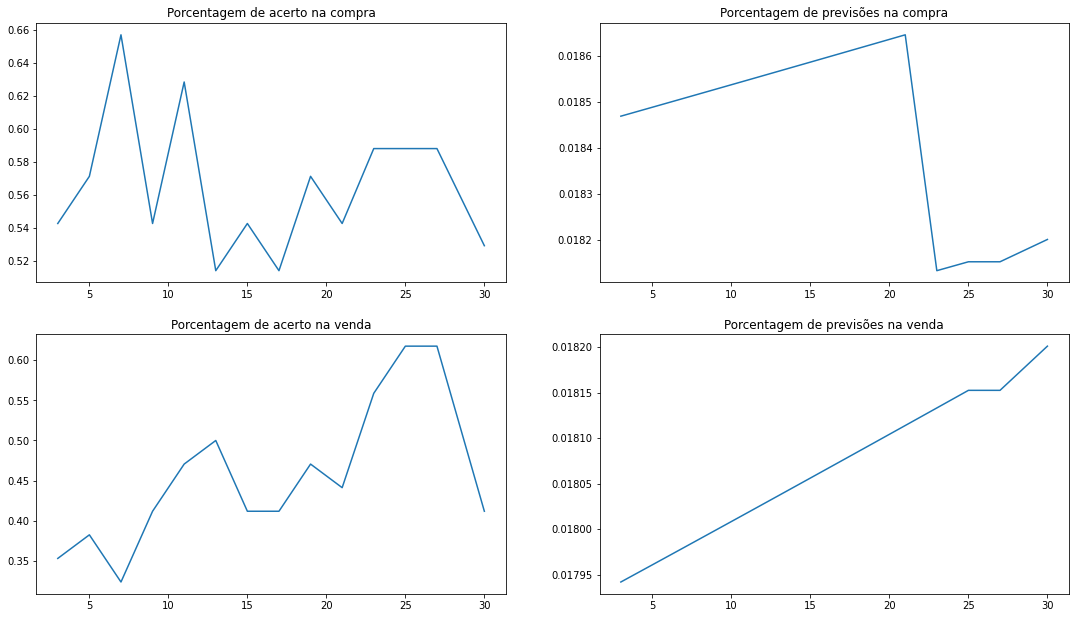

In [28]:
list_dfs = [df_ticker3, df_ticker5, df_ticker7, df_ticker9, df_ticker11, df_ticker13, df_ticker15, df_ticker17,
            df_ticker19, df_ticker21, df_ticker23, df_ticker25, df_ticker27, df_ticker30]
days = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 30]
porcent_compra_row = []
porcent_venda_row = []
porcentagem_previsao_compra_row = []
porcentagem_previsao_venda_row = []
for df in list_dfs:
    porcent_compra, porcent_venda, porcentagem_previsao_compra, porcentagem_previsao_venda = valida_mms_label(df)
    porcent_compra_row.append(porcent_compra)
    porcent_venda_row.append(porcent_venda)
    porcentagem_previsao_compra_row.append(porcentagem_previsao_compra)
    porcentagem_previsao_venda_row.append(porcentagem_previsao_venda)

mms_compara= {
    'days': days,
    'percent_compra' : porcent_compra_row,
    'percent_venda': porcent_venda_row,
    'porcentagem_previsao_compra': porcentagem_previsao_compra_row,
    'porcentagem_previsao_venda': porcentagem_previsao_venda_row}
df_mms = pd.DataFrame(mms_compara)


figure, axis = plt.subplots(2, 2)

figure.set_size_inches(18.5, 10.5)
# For Sine Function
axis[0, 0].plot('days', 'percent_compra', data = df_mms,)
axis[0, 0].set_title("Porcentagem de acerto na compra")

axis[1, 0].plot('days', 'percent_venda', data = df_mms,)
axis[1, 0].set_title("Porcentagem de acerto na venda")

axis[0, 1].plot('days', 'porcentagem_previsao_compra', data = df_mms,)
axis[0, 1].set_title("Porcentagem de previsões na compra")

axis[1, 1].plot('days', 'porcentagem_previsao_venda', data = df_mms,)
axis[1, 1].set_title("Porcentagem de previsões na venda")
  
# Combine all the operations and display
plt.show()


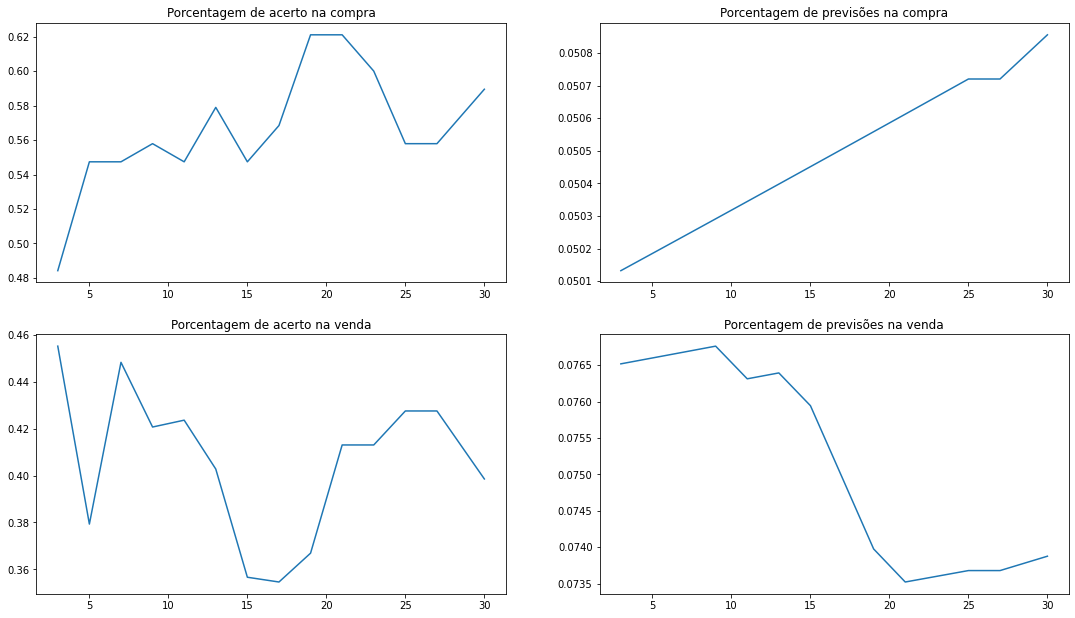

In [31]:
list_dfs = [df_ticker3, df_ticker5, df_ticker7, df_ticker9, df_ticker11, df_ticker13, df_ticker15, df_ticker17,
            df_ticker19, df_ticker21, df_ticker23, df_ticker25, df_ticker27, df_ticker30]
days = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 30]
porcent_compra_row = []
porcent_venda_row = []
porcentagem_previsao_compra_row = []
porcentagem_previsao_venda_row = []
for df in list_dfs:
    porcent_compra, porcent_venda, porcentagem_previsao_compra, porcentagem_previsao_venda = valida_bb_label(df)
    porcent_compra_row.append(porcent_compra)
    porcent_venda_row.append(porcent_venda)
    porcentagem_previsao_compra_row.append(porcentagem_previsao_compra)
    porcentagem_previsao_venda_row.append(porcentagem_previsao_venda)

mms_compara= {
    'days': days,
    'percent_compra' : porcent_compra_row,
    'percent_venda': porcent_venda_row,
    'porcentagem_previsao_compra': porcentagem_previsao_compra_row,
    'porcentagem_previsao_venda': porcentagem_previsao_venda_row}
df_mms = pd.DataFrame(mms_compara)


figure, axis = plt.subplots(2, 2)

figure.set_size_inches(18.5, 10.5)
# For Sine Function
axis[0, 0].plot('days', 'percent_compra', data = df_mms,)
axis[0, 0].set_title("Porcentagem de acerto na compra")

axis[1, 0].plot('days', 'percent_venda', data = df_mms,)
axis[1, 0].set_title("Porcentagem de acerto na venda")

axis[0, 1].plot('days', 'porcentagem_previsao_compra', data = df_mms,)
axis[0, 1].set_title("Porcentagem de previsões na compra")

axis[1, 1].plot('days', 'porcentagem_previsao_venda', data = df_mms,)
axis[1, 1].set_title("Porcentagem de previsões na venda")
  
# Combine all the operations and display
plt.show()


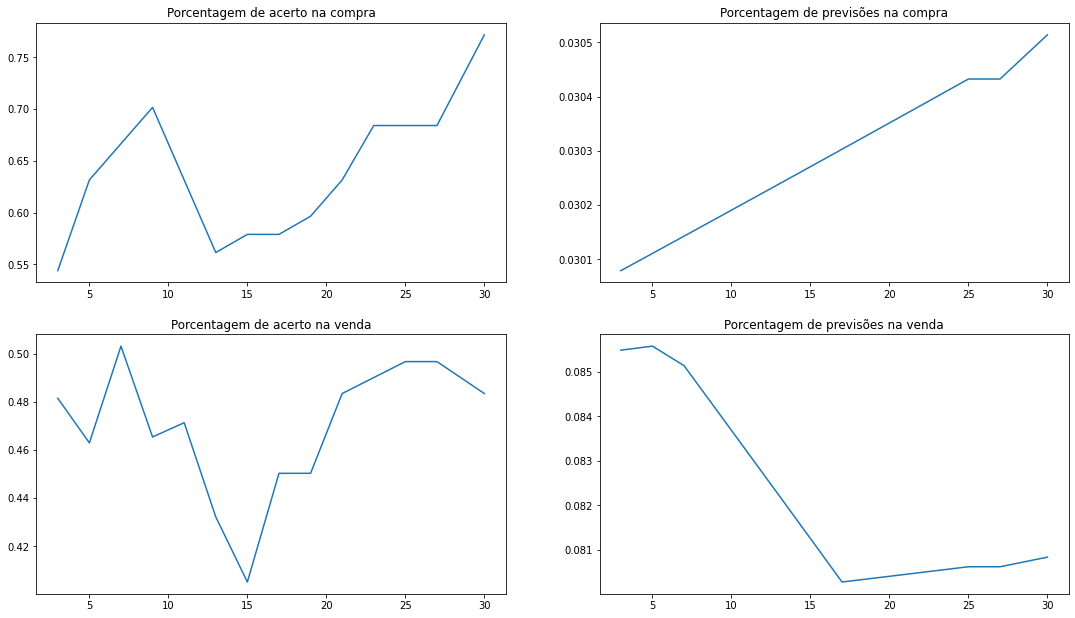

In [32]:
list_dfs = [df_ticker3, df_ticker5, df_ticker7, df_ticker9, df_ticker11, df_ticker13, df_ticker15, df_ticker17,
            df_ticker19, df_ticker21, df_ticker23, df_ticker25, df_ticker27, df_ticker30]
days = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 30]
porcent_compra_row = []
porcent_venda_row = []
porcentagem_previsao_compra_row = []
porcentagem_previsao_venda_row = []
for df in list_dfs:
    porcent_compra, porcent_venda, porcentagem_previsao_compra, porcentagem_previsao_venda = valida_ifr_label(df)
    porcent_compra_row.append(porcent_compra)
    porcent_venda_row.append(porcent_venda)
    porcentagem_previsao_compra_row.append(porcentagem_previsao_compra)
    porcentagem_previsao_venda_row.append(porcentagem_previsao_venda)

mms_compara= {
    'days': days,
    'percent_compra' : porcent_compra_row,
    'percent_venda': porcent_venda_row,
    'porcentagem_previsao_compra': porcentagem_previsao_compra_row,
    'porcentagem_previsao_venda': porcentagem_previsao_venda_row}
df_mms = pd.DataFrame(mms_compara)


figure, axis = plt.subplots(2, 2)

figure.set_size_inches(18.5, 10.5)
# For Sine Function
axis[0, 0].plot('days', 'percent_compra', data = df_mms,)
axis[0, 0].set_title("Porcentagem de acerto na compra")

axis[1, 0].plot('days', 'percent_venda', data = df_mms,)
axis[1, 0].set_title("Porcentagem de acerto na venda")

axis[0, 1].plot('days', 'porcentagem_previsao_compra', data = df_mms,)
axis[0, 1].set_title("Porcentagem de previsões na compra")

axis[1, 1].plot('days', 'porcentagem_previsao_venda', data = df_mms,)
axis[1, 1].set_title("Porcentagem de previsões na venda")
  
# Combine all the operations and display
plt.show()


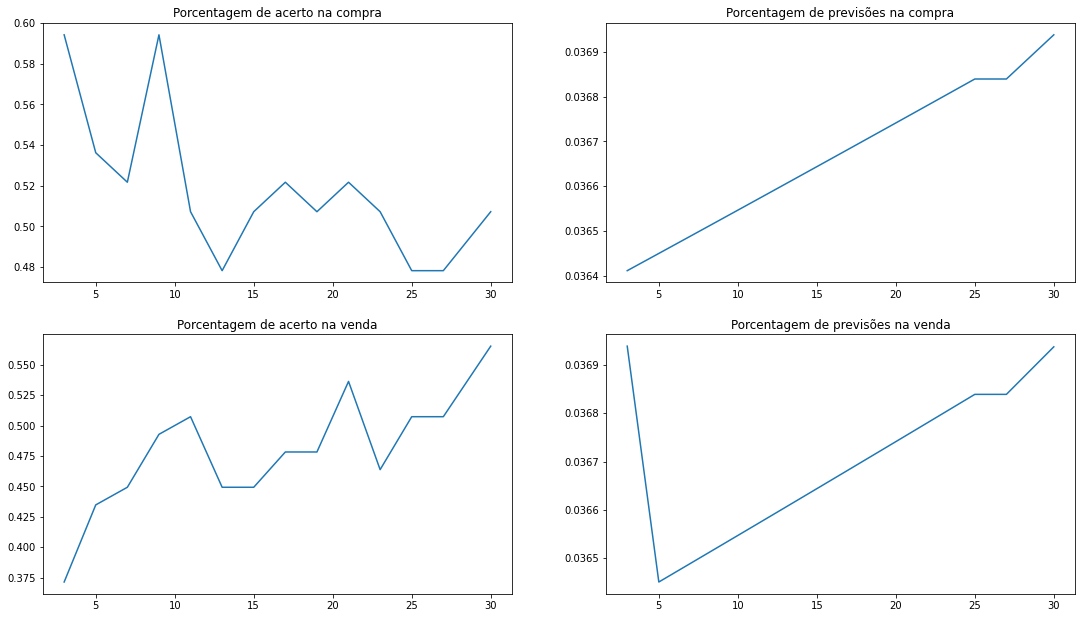

In [34]:
list_dfs = [df_ticker3, df_ticker5, df_ticker7, df_ticker9, df_ticker11, df_ticker13, df_ticker15, df_ticker17,
            df_ticker19, df_ticker21, df_ticker23, df_ticker25, df_ticker27, df_ticker30]
days = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 30]
porcent_compra_row = []
porcent_venda_row = []
porcentagem_previsao_compra_row = []
porcentagem_previsao_venda_row = []
for df in list_dfs:
    porcent_compra, porcent_venda, porcentagem_previsao_compra, porcentagem_previsao_venda = valida_macd_label(df)
    porcent_compra_row.append(porcent_compra)
    porcent_venda_row.append(porcent_venda)
    porcentagem_previsao_compra_row.append(porcentagem_previsao_compra)
    porcentagem_previsao_venda_row.append(porcentagem_previsao_venda)

mms_compara= {
    'days': days,
    'percent_compra' : porcent_compra_row,
    'percent_venda': porcent_venda_row,
    'porcentagem_previsao_compra': porcentagem_previsao_compra_row,
    'porcentagem_previsao_venda': porcentagem_previsao_venda_row}
df_mms = pd.DataFrame(mms_compara)


figure, axis = plt.subplots(2, 2)

figure.set_size_inches(18.5, 10.5)
# For Sine Function
axis[0, 0].plot('days', 'percent_compra', data = df_mms,)
axis[0, 0].set_title("Porcentagem de acerto na compra")

axis[1, 0].plot('days', 'percent_venda', data = df_mms,)
axis[1, 0].set_title("Porcentagem de acerto na venda")

axis[0, 1].plot('days', 'porcentagem_previsao_compra', data = df_mms,)
axis[0, 1].set_title("Porcentagem de previsões na compra")

axis[1, 1].plot('days', 'porcentagem_previsao_venda', data = df_mms,)
axis[1, 1].set_title("Porcentagem de previsões na venda")
  
# Combine all the operations and display
plt.show()


In [61]:
### Correlação
columns_to_corr = ['open', 'high', 'low', 'volume', 'mms_15', 'mms_30', 'mme_50', 'mme_200',
                   'mme_200_adj_120', 'mme_200_adj_80', 'prox_mme_adj', 'bb_upper', 'bb_central', 
                   'bb_lower', 'bb_band_dist', 'ifr', 'macd', 'macd_sinal', 'macd_hist', '%_k', '%D', 
                   'dema', 'momentum', 'roc']

df = corr_features(df_ticker3, 3, columns_to_corr)

In [126]:
columns_to_df = ['open', 'high', 'low', 'volume', 'mms_15', 'mms_30', 'mme_50', 'mme_200',
                   'mme_200_adj_120', 'mme_200_adj_80', 'prox_mme_adj', 'bb_upper', 'bb_central', 
                   'bb_lower', 'bb_band_dist', 'ifr', 'macd', 'macd_sinal', 'macd_hist', '%_k', '%D', 
                   'dema', 'momentum', 'roc', 'days']

list_dfs = [df_ticker3, df_ticker5, df_ticker7, df_ticker9, df_ticker11, df_ticker13, df_ticker15, df_ticker17,
            df_ticker19, df_ticker21, df_ticker23, df_ticker25, df_ticker27, df_ticker30]
df_total = pd.DataFrame()
days = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 30]
i = 0
for df in list_dfs:
    df1 = corr_features(df, days[i], columns_to_corr)
    first_row = df1.iloc[1:, 0].to_list()
    first_row.append(days[i])
    i = i + 1
    first_row = [first_row]
    df2 = pd.DataFrame(first_row, columns = columns_to_df)
    df_total = pd.concat([df_total, df2])
    
df_total = df_total.reset_index(drop = True)

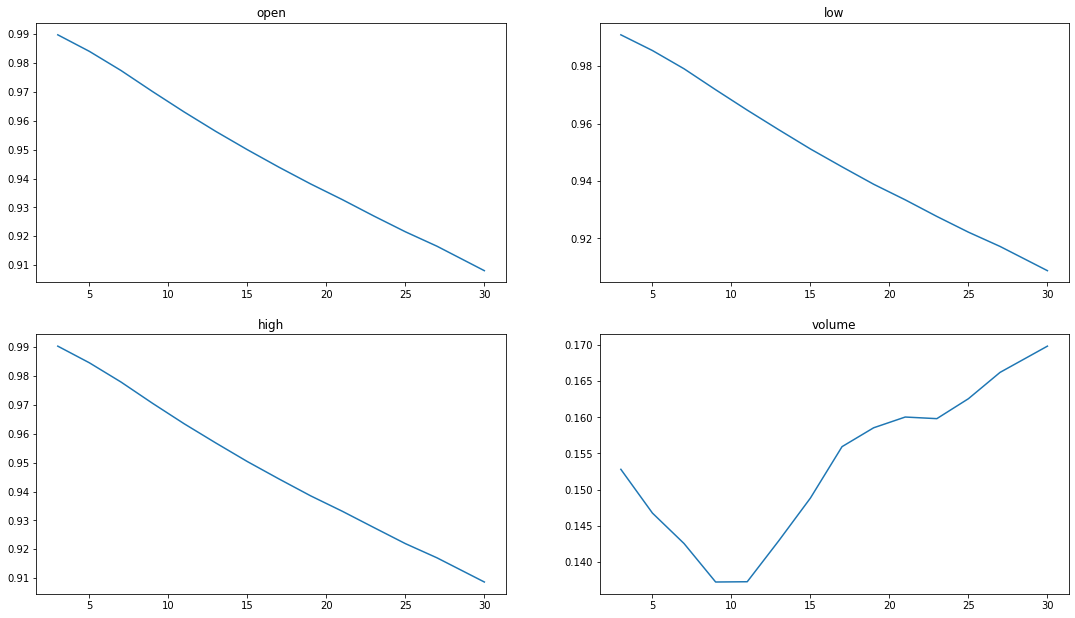

In [133]:
figure, axis = plt.subplots(2, 2)

figure.set_size_inches(18.5, 10.5)
# For Sine Function
axis[0, 0].plot('days', 'open', data = df_total)
axis[0, 0].set_title("open")

axis[1, 0].plot('days', 'high', data = df_total)
axis[1, 0].set_title("high")

axis[0, 1].plot('days', 'low', data = df_total)
axis[0, 1].set_title("low")

axis[1, 1].plot('days', 'volume', data = df_total)
axis[1, 1].set_title("volume")
  
# Combine all the operations and display
plt.show()

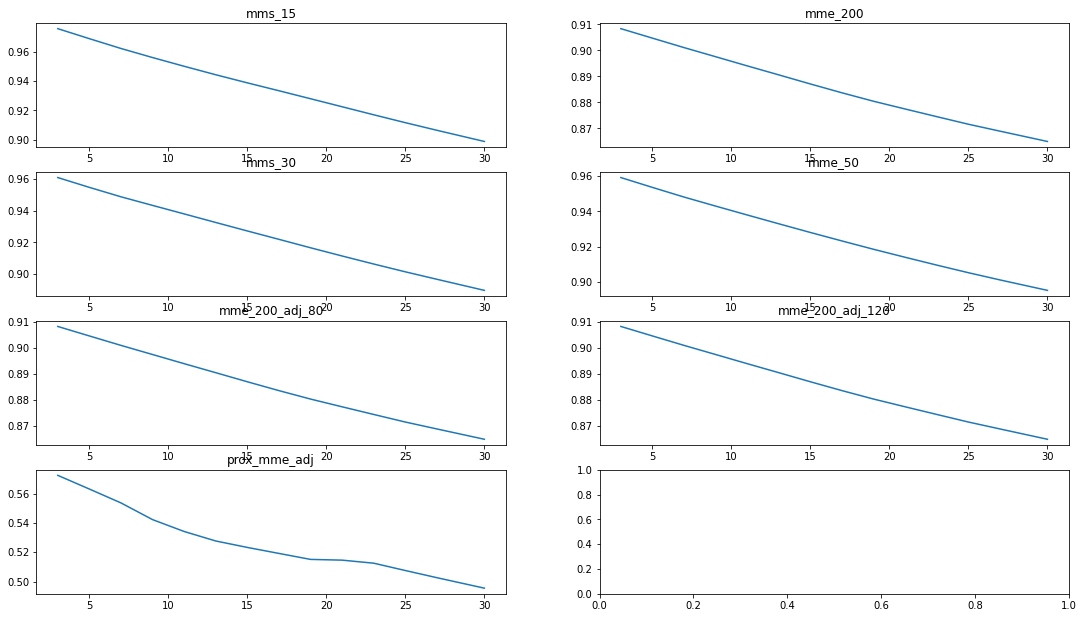

In [136]:
figure, axis = plt.subplots(4, 2)

figure.set_size_inches(18.5, 10.5)
# For Sine Function
axis[0, 0].plot('days', 'mms_15', data = df_total)
axis[0, 0].set_title("mms_15")

axis[1, 0].plot('days', 'mms_30', data = df_total)
axis[1, 0].set_title("mms_30")

axis[0, 1].plot('days', 'mme_200', data = df_total)
axis[0, 1].set_title("mme_200")

axis[1, 1].plot('days', 'mme_50', data = df_total)
axis[1, 1].set_title("mme_50")

axis[2, 0].plot('days', 'mme_200_adj_80', data = df_total)
axis[2, 0].set_title("mme_200_adj_80")

axis[2, 1].plot('days', 'mme_200_adj_120', data = df_total)
axis[2, 1].set_title("mme_200_adj_120")

axis[3, 0].plot('days', 'prox_mme_adj', data = df_total)
axis[3, 0].set_title("prox_mme_adj")
# Combine all the operations and display
plt.show()

In [ ]:
'bb_upper', 'bb_central', 
                   'bb_lower', 'bb_band_dist',

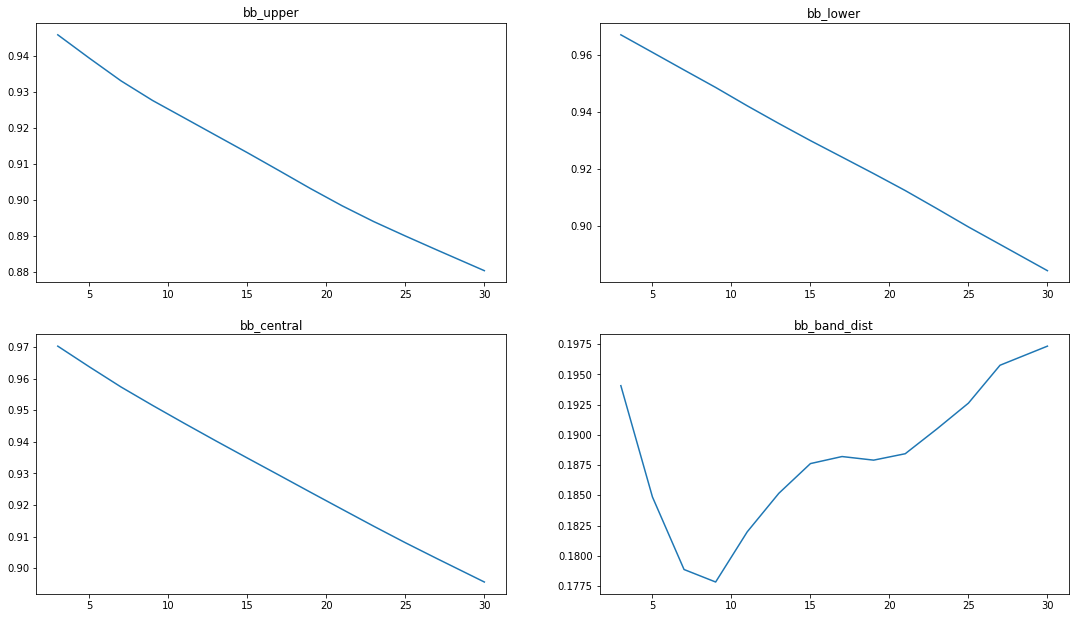

In [137]:
figure, axis = plt.subplots(2, 2)

figure.set_size_inches(18.5, 10.5)
# For Sine Function
axis[0, 0].plot('days', 'bb_upper', data = df_total)
axis[0, 0].set_title("bb_upper")

axis[1, 0].plot('days', 'bb_central', data = df_total)
axis[1, 0].set_title("bb_central")

axis[0, 1].plot('days', 'bb_lower', data = df_total)
axis[0, 1].set_title("bb_lower")

axis[1, 1].plot('days', 'bb_band_dist', data = df_total)
axis[1, 1].set_title("bb_band_dist")
  
# Combine all the operations and display
plt.show()

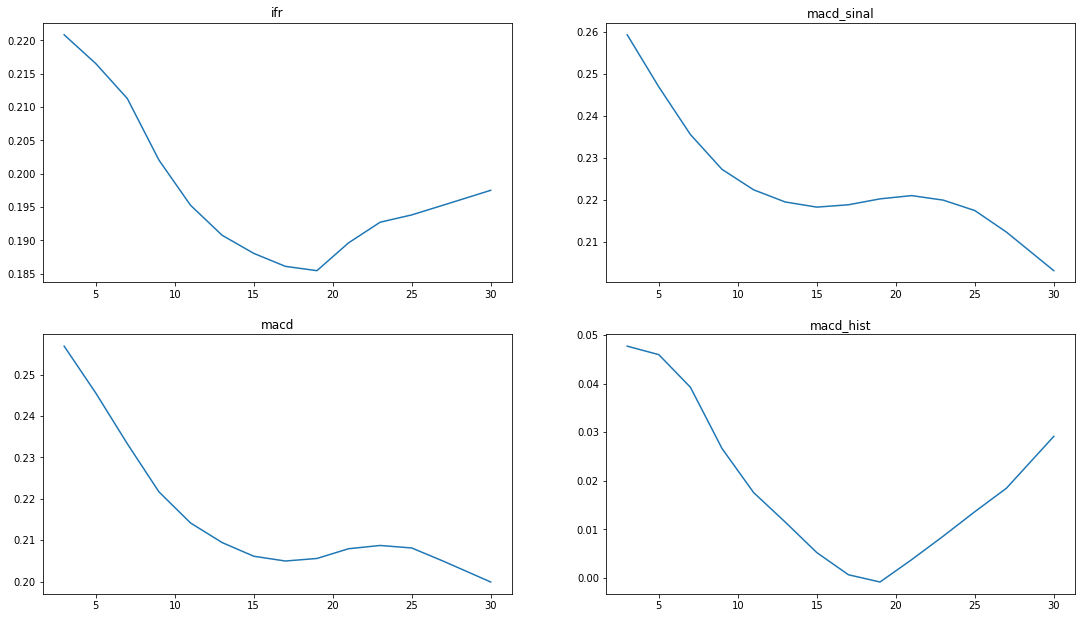

In [138]:
figure, axis = plt.subplots(2, 2)

figure.set_size_inches(18.5, 10.5)
# For Sine Function
axis[0, 0].plot('days', 'ifr', data = df_total)
axis[0, 0].set_title("ifr")

axis[1, 0].plot('days', 'macd', data = df_total)
axis[1, 0].set_title("macd")

axis[0, 1].plot('days', 'macd_sinal', data = df_total)
axis[0, 1].set_title("macd_sinal")

axis[1, 1].plot('days', 'macd_hist', data = df_total)
axis[1, 1].set_title("macd_hist")
  
# Combine all the operations and display
plt.show()

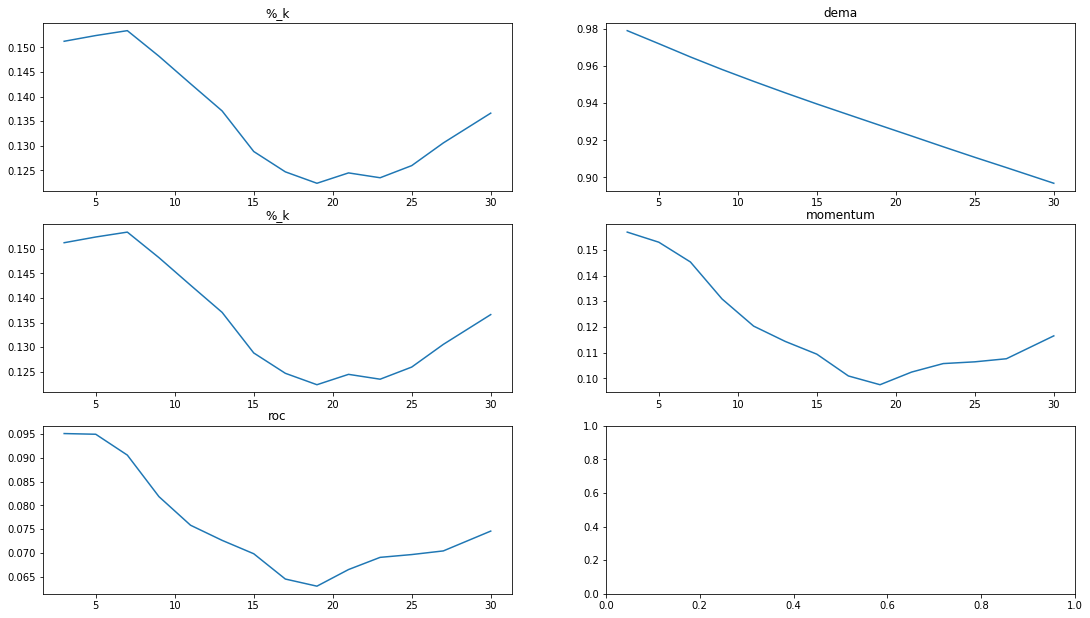

In [139]:
figure, axis = plt.subplots(3, 2)

figure.set_size_inches(18.5, 10.5)
# For Sine Function
axis[0, 0].plot('days', '%_k', data = df_total)
axis[0, 0].set_title("%_k")

axis[1, 0].plot('days', '%_k', data = df_total)
axis[1, 0].set_title("%_k")

axis[0, 1].plot('days', 'dema', data = df_total)
axis[0, 1].set_title("dema")

axis[1, 1].plot('days', 'momentum', data = df_total)
axis[1, 1].set_title("momentum")

axis[2, 0].plot('days', 'roc', data = df_total)
axis[2, 0].set_title("roc")

plt.show()